## MFG Data Visualization Analysis


This notebook contains multiple visualization plots, each with independent code blocks and descriptions.

Since the weights are fixed, regulatory scores may produce small negative values during testing, so they need to be adjusted to 0.

In [1]:
# ==========================================
# Import necessary libraries and load data
# ==========================================
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import sparse
import networkx as nx
import os

# Load data
adata = sc.read_h5ad("../reproduce_data/MFG_RS_score.h5ad")
adata.X = np.where(adata.X < 0, 0, adata.X)

/opt/conda/envs/scregat/lib/python3.10/site-packages/anndata/_metadata.py:15: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
adata.obs

,celltype,celltype_rna,nb_features
TCCATACCAATGATGCGGCATTCT,oligodendrocytes,oligodendrocytes,11743
ATTGAGGAACCGGAAGACACTAAG,oligodendrocytes,oligodendrocytes,27510
ACGCGACGTCTGACGAGCCACAGG,oligodendrocytes,oligodendrocytes,16703
ATTGAGGAATCCGAACAGCCTCAT,oligodendrocytes,oligodendrocytes,5236
GAAGAGTAGTTCTCTCTACCGAGG,oligodendrocytes,oligodendrocytes,14846
...,...,...,...
TCCATACCATCCGAACCTACGACA,oligodendrocytes,oligodendrocytes,1346
ATTGAGGATGGATCGTAGCTCGCT,oligodendrocytes,oligodendrocytes,950
GAAGAGTACCATATGCTTACAGGA,excitatory_neuron,excitatory_neuron,4953
ATTGAGGAGCCAAGGCAACGTTCC,astrocyte,astrocyte,1237


The `.var` contains regulatory relationships


In [3]:
adata.var

""
chr1-1432429-1432929_VWA1
chr1-1433094-1433707_VWA1
chr1-1434222-1434722_VWA1
chr1-1435340-1435840_VWA1
chr1-3068905-3069405_PRDM16
...
chrX-154489489-154490449_PLXNB3
chrX-154490573-154491195_PLXNB3
chrX-154762391-154763458_PLXNB3
chrX-154980730-154981230_GAB3


The `.X` contains regulatory scores

In [4]:

adata.X

array([[0.91024305, 0.91024305, 0.90275994, ..., 0.91605534, 0.        ,
        0.        ],
       [0.91151023, 0.89397214, 0.8989939 , ..., 0.87393287, 0.        ,
        0.        ],
       [0.87774461, 0.88005506, 0.88005506, ..., 0.89804149, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.02063028, ..., 0.91149268, 0.        ,
        0.        ],
       [0.        , 0.        , 0.88280677, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.0037511 , 0.98381627, ..., 0.        , 0.        ,
        0.        ]])

## Helper Function Definitions


Define helper functions required for data processing and plotting.

In [5]:
def process_cell_types(adata_object):
    """
    Process cell type names to match the validation set.
    Logic: Merge 'excitatory' and 'inhibitory' neurons into 'neurons'.
    """
    # Ensure data is read as string type, removing numpy.str_ effects
    raw_cell_types = adata_object.obs['celltype'].astype(str).values
    
    cell_type_cpu = np.array(raw_cell_types)
    
    # --- Logic from scReGAT paper ---
    # Unify excitatory and inhibitory neurons into 'neurons'
    # Note: Using list comprehension to generate indices
    cell_type_cpu[[idx for idx, t in enumerate(cell_type_cpu) if t.startswith('excitatory_neuron')]] = 'neurons'
    cell_type_cpu[[idx for idx, t in enumerate(cell_type_cpu) if t.startswith('inhibitory_neuron')]] = 'neurons'
    
    unique_types = np.unique(cell_type_cpu)
    print(f"[INFO] Processed cell type list: {unique_types}")
    
    return cell_type_cpu, unique_types

def plot_regulatory_scores_box(rs_matrix, edge_indices, cell_types, target_celltype, palette=None, title=None):
    """
    Generate box plots replicating the style of Figure 1e (without P-values).
    """
    unique_types = np.unique(cell_types)
    
    # 1. Z-score Normalization (Comparing relative intensity)
    selected_scores = rs_matrix[:, edge_indices]
    z_scores = zscore(selected_scores, axis=0)
    z_scores = np.nan_to_num(z_scores)

    # 2. Aggregate Scores (Mean of edges -> Median of cells)
    plot_data = []
    mean_vals = []
    
    for ct in unique_types:
        cells_mask = (cell_types == ct)
        if np.sum(cells_mask) == 0: continue
            
        # Calculate mean score across selected edges for each cell
        ct_cell_scores = z_scores[cells_mask].mean(axis=1)
        mean_vals.append(np.median(ct_cell_scores))
        
        # Clip outliers for better visualization (Clip to -1, 1)
        ct_scores_clipped = np.clip(ct_cell_scores, -1, 1)
        
        df_temp = pd.DataFrame({
            'Regulatory Score': ct_scores_clipped,
            'Cell Type': ct
        })
        plot_data.append(df_temp)
        
    df_plot = pd.concat(plot_data)
    
    # 3. Sorting: Target cell type first, others sorted by median descending
    other_types = [ct for ct in unique_types if ct != target_celltype]
    sorted_others = sorted(other_types, key=lambda x: mean_vals[list(unique_types).index(x)], reverse=True)
    order = [target_celltype] + sorted_others
    
    # 4. Plotting
    plt.figure(figsize=(5, 5.5))
    
    # Check if palette covers all keys
    missing_keys = set(order) - set(palette.keys())
    if missing_keys:
        print(f"[WARN] Palette missing keys, using defaults for: {missing_keys}")
    
    sns.boxplot(
        x='Cell Type', 
        y='Regulatory Score', 
        data=df_plot, 
        order=order,
        palette=palette,
        showfliers=False, 
        width=0.6,
        linewidth=1.5,
        whis=1.5
    )
    
    plt.title(title if title else f"{target_celltype.capitalize()}-specific RRs", fontsize=16, weight='bold', pad=15)
    plt.ylabel("Scaled RS Values", fontsize=14, weight='bold')
    plt.xlabel("")
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
    plt.yticks(fontsize=12)
    plt.ylim(-1.2, 1.6)
    
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()

# Set plotting style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

# Process cell types
cell_type_cpu, unique_celltype = process_cell_types(adata)

# Define color palette
paper_palette = {
    'microglia': '#2ca02c',
    'neurons': '#ff7f0e',
    'oligodendrocytes': '#9467bd',
    'astrocyte': '#1f77b4',
    'polydendrocytes': '#e377c2',
    'unknown': '#7f7f7f'
}

[INFO] Processed cell type list: ['astrocyte' 'microglia' 'neurons' 'oligodendrocytes' 'polydendrocytes']


## Plot 1: Microglia-specific Regulatory Score Boxplot


Display the distribution of Microglia-specific regulatory elements (RRs) across different cell types.

Found 1762 overlapping edges for microglia.


/tmp/ipykernel_45964/3203998289.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


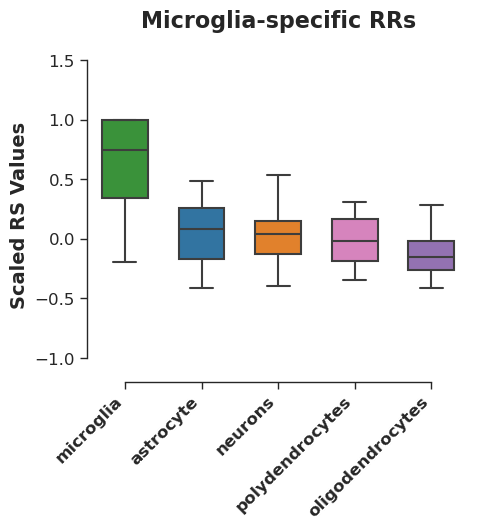

In [6]:
# Load Microglia-specific edge data
data_dir = "../data/celltype_specific_cRE_interactions/"
file_path = os.path.join(data_dir, "base_edge_microglia.txt")

if os.path.exists(file_path):
    edge_base = pd.read_csv(file_path, header=None, sep='\t', names=['peak', 'gene'])
    edge_base['edge_id'] = edge_base['peak'].astype(str) + "_" + edge_base['gene'].astype(str)
    valid_indices = np.where(adata.var_names.isin(edge_base['edge_id']))[0]
    print(f"Found {len(valid_indices)} overlapping edges for microglia.")
    
    plot_regulatory_scores_box(
        rs_matrix=adata.X,
        edge_indices=valid_indices,
        cell_types=cell_type_cpu,
        target_celltype="microglia",
        palette=paper_palette,
        title="Microglia-specific RRs"
    )
else:
    print(f"[WARN] File not found: {file_path}")


## Plot 2: Neurons-specific Regulatory Score Boxplot


Display the distribution of Neurons-specific regulatory elements (RRs) across different cell types.

Found 2577 overlapping edges for neurons.


/tmp/ipykernel_45964/3203998289.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


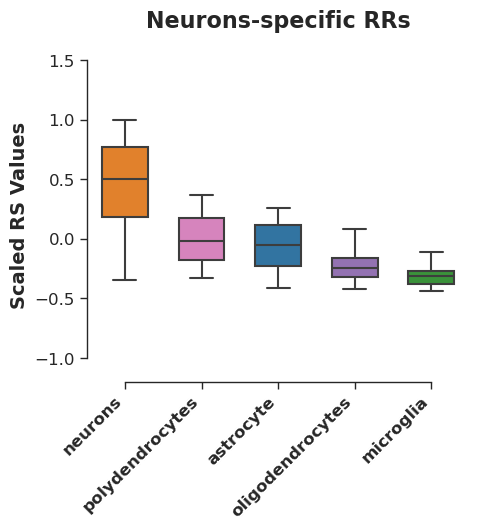

In [7]:
# Load Neurons-specific edge data
data_dir = "../data/celltype_specific_cRE_interactions/"
file_path = os.path.join(data_dir, "base_edge_neurons.txt")

if os.path.exists(file_path):
    edge_base = pd.read_csv(file_path, header=None, sep='\t', names=['peak', 'gene'])
    edge_base['edge_id'] = edge_base['peak'].astype(str) + "_" + edge_base['gene'].astype(str)
    valid_indices = np.where(adata.var_names.isin(edge_base['edge_id']))[0]
    print(f"Found {len(valid_indices)} overlapping edges for neurons.")
    
    plot_regulatory_scores_box(
        rs_matrix=adata.X,
        edge_indices=valid_indices,
        cell_types=cell_type_cpu,
        target_celltype="neurons",
        palette=paper_palette,
        title="Neurons-specific RRs"
    )
else:
    print(f"[WARN] File not found: {file_path}")

## Plot 3: Oligodendrocytes-specific Regulatory Score Boxplot


Display the distribution of Oligodendrocytes-specific regulatory elements (RRs) across different cell types.

Found 2440 overlapping edges for oligodendrocytes.


/tmp/ipykernel_45964/3203998289.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


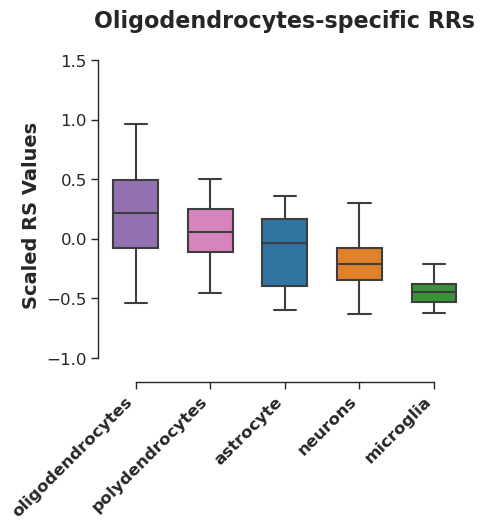

In [8]:
# Load Oligodendrocytes-specific edge data
data_dir = "../data/celltype_specific_cRE_interactions/"
file_path = os.path.join(data_dir, "base_edge_oligodendrocytes.txt")

if os.path.exists(file_path):
    edge_base = pd.read_csv(file_path, header=None, sep='\t', names=['peak', 'gene'])
    edge_base['edge_id'] = edge_base['peak'].astype(str) + "_" + edge_base['gene'].astype(str)
    valid_indices = np.where(adata.var_names.isin(edge_base['edge_id']))[0]
    print(f"Found {len(valid_indices)} overlapping edges for oligodendrocytes.")
    
    plot_regulatory_scores_box(
        rs_matrix=adata.X,
        edge_indices=valid_indices,
        cell_types=cell_type_cpu,
        target_celltype="oligodendrocytes",
        palette=paper_palette,
        title="Oligodendrocytes-specific RRs"
    )
else:
    print(f"[WARN] File not found: {file_path}")


## Plot 4: UMAP Dimensionality Reduction Visualization


Perform UMAP dimensionality reduction based on regulatory scores to display the distribution of cells in regulatory space.

/opt/conda/envs/scregat/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/conda/envs/scregat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/scregat/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


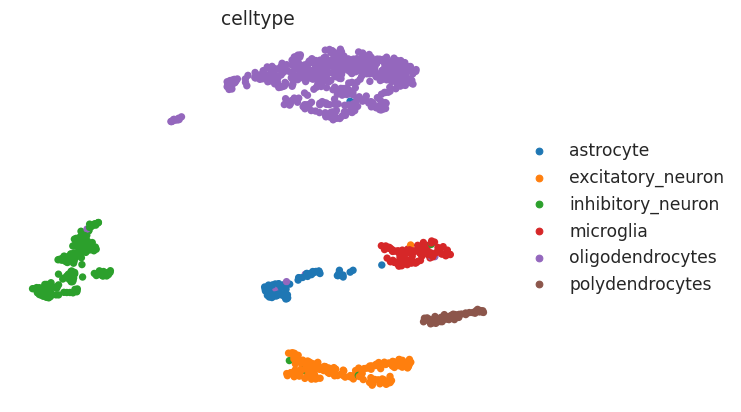

In [9]:
# Prepare UMAP visualization data
ris_adata = adata.copy()
ris_adata.X[ris_adata.X < 0] = 0

# Normalization and log transformation
sc.pp.normalize_total(ris_adata, target_sum=1e4)
sc.pp.log1p(ris_adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(ris_adata, n_top_genes=3000, flavor='seurat')

# Keep only highly variable genes
ris_adata = ris_adata[:, ris_adata.var.highly_variable]

# Scale data
sc.pp.scale(ris_adata, max_value=10)

# PCA dimensionality reduction
sc.tl.pca(ris_adata, svd_solver='arpack', n_comps=30)

# Build neighbor graph
sc.pp.neighbors(ris_adata, n_neighbors=20, n_pcs=30, metric="cosine")

# UMAP dimensionality reduction
sc.tl.umap(ris_adata, min_dist=0.5)

# Plot UMAP
sc.pl.umap(ris_adata, color=['celltype'], wspace=0.5, frameon=False)

## Plot 5: Gene-level Regulatory Activity Dotplot


Aggregate edge-level regulatory scores to gene level, displaying the regulatory activity of marker genes across different cell types.

/opt/conda/envs/scregat/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/tmp/ipykernel_45964/2062331045.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

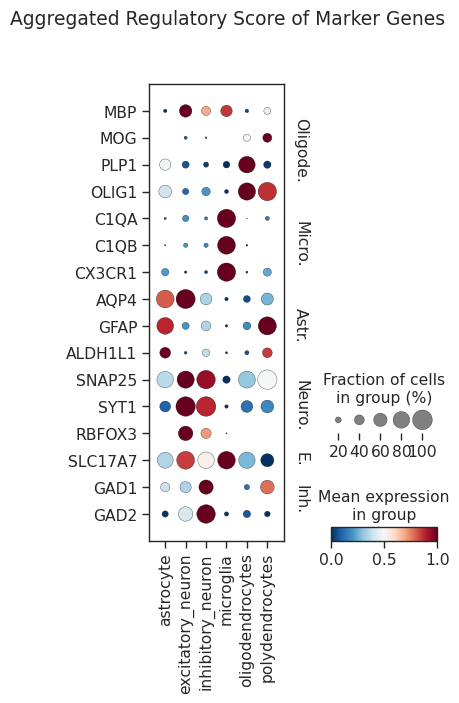

In [10]:
# Extract target gene names
adata.var['target_gene'] = [x.split('_')[-1] for x in adata.var_names]

# Define marker genes
marker_genes = {
    'Oligodendrocytes': ['MBP', 'MOG', 'PLP1', 'OLIG1'],
    'Microglia': ['C1QA', 'C1QB', 'CSF1R', 'CX3CR1'],
    'Astrocytes': ['AQP4', 'GFAP', 'ALDH1L1'],
    'Neurons': ['SNAP25', 'SYT1', 'RBFOX3'], 
    'Excitatory': ['SLC17A7', 'NEUROD6'],
    'Inhibitory': ['GAD1', 'GAD2']
}

flat_markers = [g for cat in marker_genes.values() for g in cat]

# Aggregate edge scores to gene level
gene_scores_df = pd.DataFrame(index=adata.obs_names)

for gene in flat_markers:
    edge_mask = adata.var['target_gene'] == gene
    if np.sum(edge_mask) > 0:
        scores = adata.X[:, edge_mask]
        if hasattr(scores, "toarray"):
            scores = scores.toarray()
        gene_scores_df[gene] = scores.mean(axis=1)

# Create gene-level AnnData object
adata_gene = sc.AnnData(X=gene_scores_df.values, obs=adata.obs)
adata_gene.var_names = gene_scores_df.columns

# Filter marker genes dictionary
marker_genes_filtered = {}
for cell_type, genes in marker_genes.items():
    existing_genes = [gene for gene in genes if gene in adata_gene.var_names]
    if existing_genes:
        marker_genes_filtered[cell_type] = existing_genes

# Plot dotplot
plt.figure(figsize=(8, 6))
sc.pl.dotplot(
    adata_gene, 
    var_names=marker_genes_filtered, 
    groupby='celltype', 
    standard_scale='var',
    title='Aggregated Regulatory Score of Marker Genes',
    cmap='RdBu_r',
    swap_axes=True,
    show=False
)
plt.tight_layout()
plt.show()

## Plot 6: Differential Regulatory Edge Heatmap



Display the top 5 most differentially expressed regulatory edges for each cell type.

         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_45964/1418404883.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x1000 with 0 Axes>

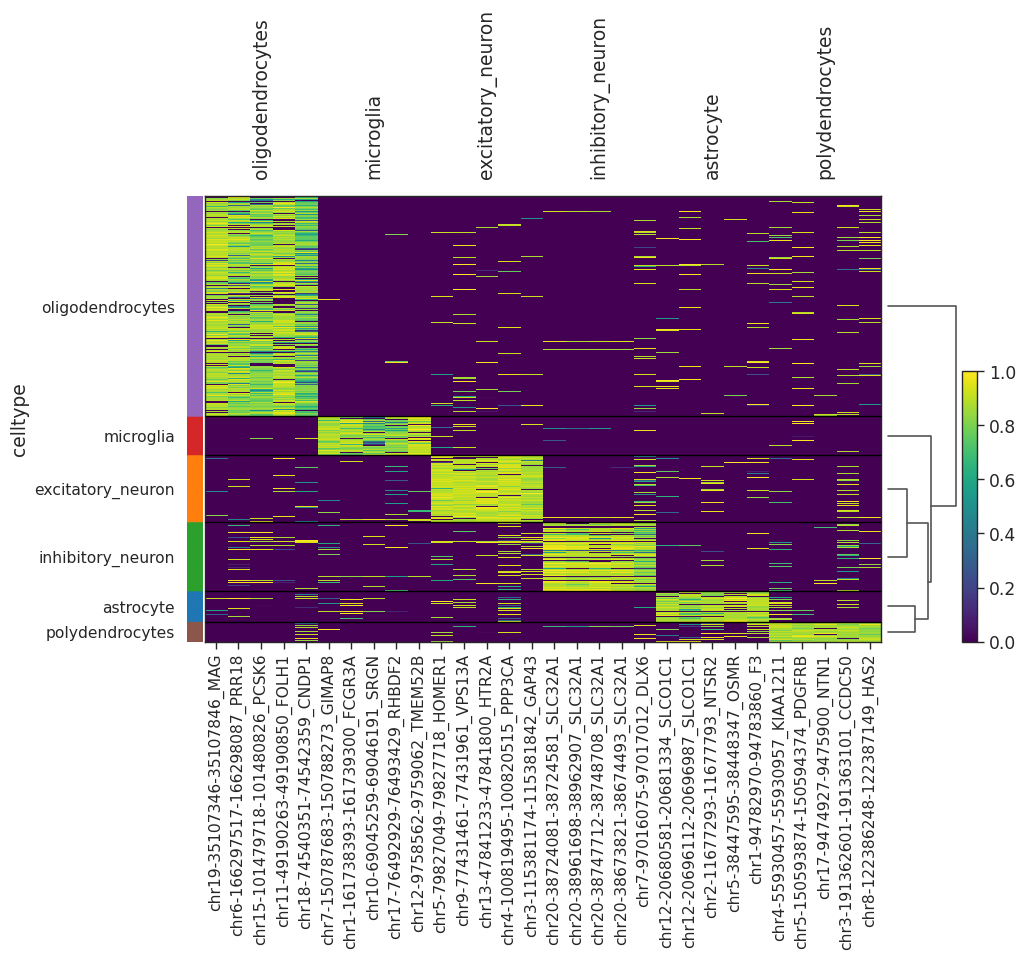

In [11]:
# Calculate differential edges (Wilcoxon rank-sum test)
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon')

# Plot heatmap
plt.figure(figsize=(8, 10))
sc.pl.rank_genes_groups_heatmap(
    adata, 
    n_genes=5,
    groupby='celltype', 
    cmap='viridis', 
    standard_scale='var', 
    show_gene_labels=True,
    show=False
)
plt.tight_layout()
plt.show()

## Plot 7: MBP Gene Most Active Regulatory Element Boxplot



Display the distribution of the most active regulatory element for the MBP gene across different cell types.

Plotting top edge for MBP: chr18-76801959-76802520_MBP


/tmp/ipykernel_45964/4197698686.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


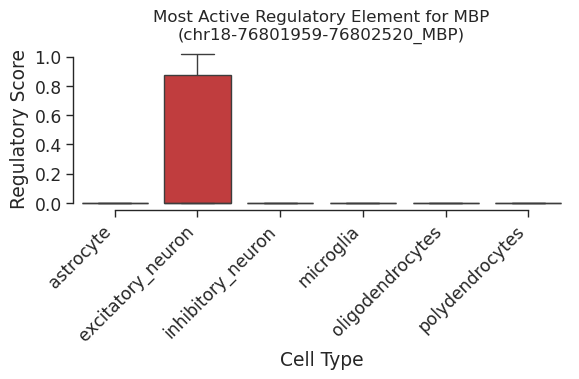

In [12]:
def plot_top_edge_for_gene(target_gene, adata_obj, palette=None):
    """Find the most active edge for a specific gene and plot its distribution"""
    gene_vars = adata_obj.var[adata_obj.var['target_gene'] == target_gene]
    if len(gene_vars) == 0:
        print(f"[WARN] Gene {target_gene} not found in edges.")
        return

    edge_indices = [adata_obj.var_names.get_loc(idx) for idx in gene_vars.index]
    X_subset = adata_obj.X[:, edge_indices]
    if hasattr(X_subset, "toarray"): 
        X_subset = X_subset.toarray()
    
    max_scores = X_subset.max(axis=0)
    best_idx_local = np.argmax(max_scores)
    best_edge_name = gene_vars.index[best_idx_local]
    
    print(f"Plotting top edge for {target_gene}: {best_edge_name}")

    plot_df = pd.DataFrame({
        'Regulatory Score': X_subset[:, best_idx_local],
        'Cell Type': adata_obj.obs['celltype'].values
    })
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x='Cell Type', 
        y='Regulatory Score', 
        data=plot_df, 
        palette=palette,
        showfliers=False
    )
    plt.title(f"Most Active Regulatory Element for {target_gene}\n({best_edge_name})", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()

# Ensure target gene names are extracted
if 'target_gene' not in adata.var.columns:
    adata.var['target_gene'] = [x.split('_')[-1] for x in adata.var_names]

my_palette2 = {
    'oligodendrocytes': '#9467bd',
    'neurons': '#ff7f0e',
    'microglia': '#2ca02c',
    'astrocyte': '#1f77b4',
    'polydendrocytes': '#e377c2',
    'unknown': '#7f7f7f',
    'excitatory_neuron': '#d62728',
    'inhibitory_neuron': '#17becf'
}

plot_top_edge_for_gene('MBP', adata, palette=my_palette2)


## Plot 8: PLP1 Gene Most Active Regulatory Element Boxplot


Display the distribution of the most active regulatory element for the PLP1 gene across different cell types.

Plotting top edge for PLP1: chrX-103776630-103777130_PLP1


/tmp/ipykernel_45964/4197698686.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


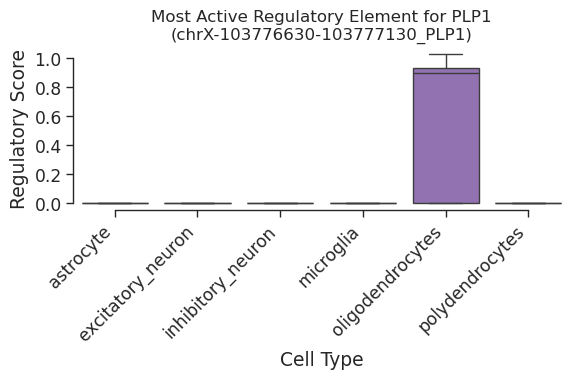

In [13]:
plot_top_edge_for_gene('PLP1', adata, palette=my_palette2)

## Plot 9: Microglia-specific Regulatory Network


Display the Microglia-specific regulatory network, where node size represents connectivity and edge width represents regulatory strength.

--- Computing Global Statistics (Mean & Std) ---
--- Extracting Network for: microglia (Z-score=True) ---


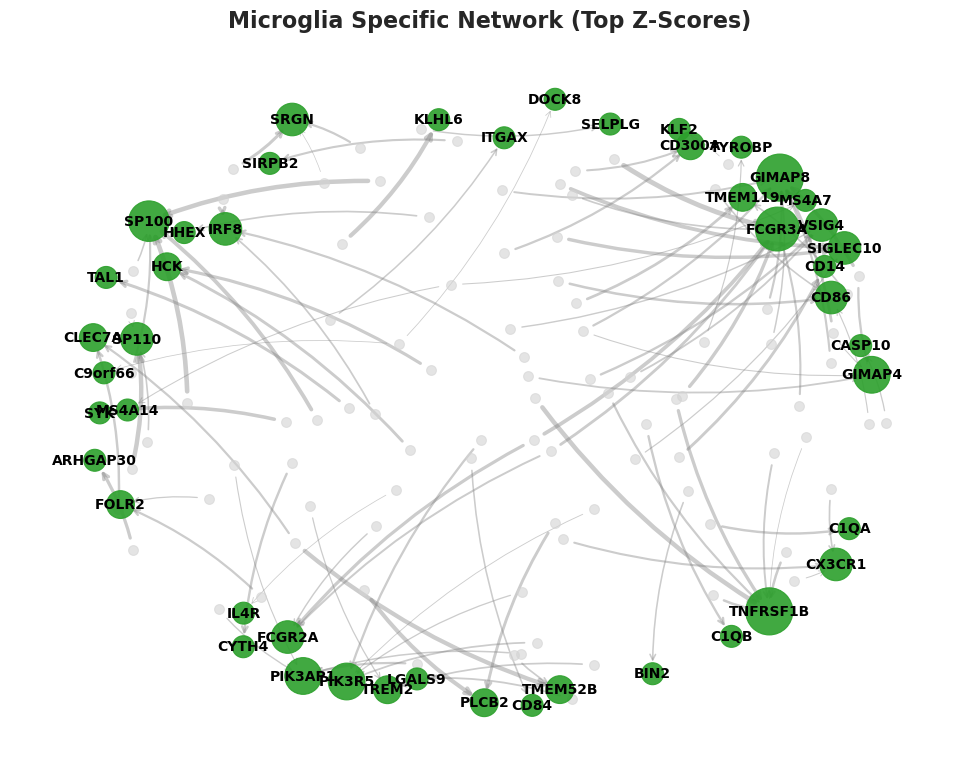

In [14]:
def prepare_global_stats(adata):
    """Pre-calculate global mean and standard deviation for fast Z-score computation"""
    print("--- Computing Global Statistics (Mean & Std) ---")
    
    if sparse.issparse(adata.X):
        mean_global = np.array(adata.X.mean(axis=0)).flatten()
        mean_sq = adata.X.multiply(adata.X).mean(axis=0)
        mean_sq = np.array(mean_sq).flatten()
        var_global = mean_sq - mean_global**2
        std_global = np.sqrt(np.clip(var_global, 1e-10, None))
    else:
        mean_global = np.mean(adata.X, axis=0)
        std_global = np.std(adata.X, axis=0)
        
    return mean_global, std_global

def get_top_edges_for_celltype(adata, cell_type, global_stats, n_top_edges=100, use_zscore=True):
    """Extract top N edges for a specific cell type"""
    print(f"--- Extracting Network for: {cell_type} (Z-score={use_zscore}) ---")
    
    mean_global, std_global = global_stats
    cells_mask = adata.obs['celltype'] == cell_type
    if not np.any(cells_mask):
        print(f"No cells found for {cell_type}")
        return None

    X_subset = adata[cells_mask].X
    mean_subset = np.array(X_subset.mean(axis=0)).flatten()
    
    if use_zscore:
        final_scores = (mean_subset - mean_global) / (std_global + 1e-9)
    else:
        final_scores = mean_subset
    
    top_indices = np.argsort(final_scores)[-n_top_edges:][::-1]
    top_edges = adata.var_names[top_indices]
    top_vals = final_scores[top_indices]
    
    df_net = pd.DataFrame({
        'edge_name': top_edges,
        'weight': top_vals
    })
    
    df_net['target'] = df_net['edge_name'].apply(lambda x: x.split('_')[-1])
    df_net['source'] = df_net['edge_name'].apply(lambda x: "_".join(x.split('_')[:-1]))
    
    return df_net

def plot_beautiful_network(df_edges, cell_type, color_theme='#1f77b4'):
    """Plot regulatory network graph"""
    if df_edges is None or df_edges.empty: 
        return

    G = nx.DiGraph()
    for _, row in df_edges.iterrows():
        w = max(row['weight'], 0.1) 
        G.add_edge(row['source'], row['target'], weight=w)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.6, seed=42, iterations=50)
    
    targets = list(set(df_edges['target']))
    sources = list(set(df_edges['source']))
    d = dict(G.degree)
    
    nx.draw_networkx_nodes(G, pos, nodelist=sources, node_color='lightgrey', 
                           node_size=50, alpha=0.6, label='Peak')
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color=color_theme, 
                           node_size=[d[t]*150 + 100 for t in targets], alpha=0.9, label='Gene')

    weights = [G[u][v]['weight'] for u,v in G.edges()]
    min_w, max_w = min(weights), max(weights)
    width_norm = [(w - min_w)/(max_w - min_w + 1e-9) * 3 + 0.5 for w in weights]
    
    nx.draw_networkx_edges(G, pos, width=width_norm, alpha=0.4, edge_color='grey',
                           connectionstyle="arc3,rad=0.1", arrowstyle='->', arrowsize=10)

    nx.draw_networkx_labels(G, pos, {n:n for n in targets}, font_size=10, font_weight='bold')

    plt.title(f"{cell_type.capitalize()} Specific Network (Top Z-Scores)", fontsize=16, weight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Calculate global statistics
global_mean, global_std = prepare_global_stats(adata)
global_stats_tuple = (global_mean, global_std)

# Extract Microglia network
network_df = get_top_edges_for_celltype(adata, 'microglia', global_stats_tuple, 
                                        n_top_edges=100, use_zscore=True)

if network_df is not None:
    plot_beautiful_network(network_df, 'microglia', color_theme='#2ca02c')

## Plot 10: Microglia Hub Genes


Display the most important hub genes in Microglia, ranked by cumulative Z-score strength.

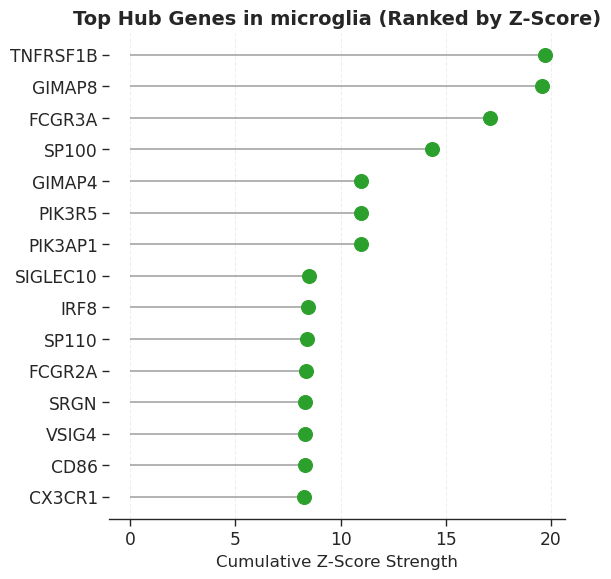

In [15]:
def plot_hub_genes(df_edges, cell_type, palette_color):
    # Summing Z-scores implies "Total Specificity"
    hub_df = df_edges.groupby('target')['weight'].sum().sort_values(ascending=True).reset_index()
    
    if len(hub_df) > 15: hub_df = hub_df.tail(15)

    plt.figure(figsize=(6, 6))
    plt.hlines(y=hub_df['target'], xmin=0, xmax=hub_df['weight'], color='grey', alpha=0.7)
    plt.scatter(hub_df['weight'], hub_df['target'], color=palette_color, s=100, zorder=3)
    
    plt.title(f"Top Hub Genes in {cell_type} (Ranked by Z-Score)", fontsize=14, weight='bold')
    plt.xlabel("Cumulative Z-Score Strength", fontsize=12)
    sns.despine(left=True)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Use previously extracted Microglia network data
if network_df is not None:
    plot_hub_genes(network_df, 'microglia', palette_color='#2ca02c')


## Plot 11: Astrocyte-specific Regulatory Network


Display the Astrocyte-specific regulatory network, where node size represents connectivity and edge width represents regulatory strength.

--- Extracting Network for: astrocyte (Z-score=True) ---


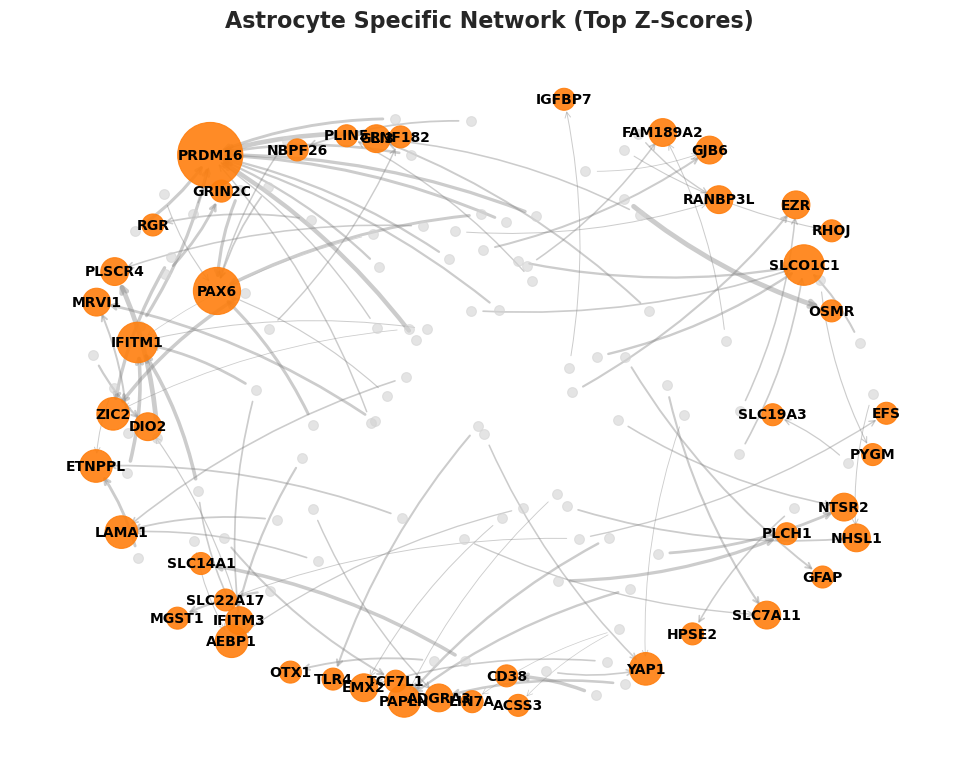

In [16]:
# use_zscore=True ensures we find SPECIFIC edges, not just generally strong ones
network_df_astro = get_top_edges_for_celltype(adata, 'astrocyte', global_stats_tuple, 
                                               n_top_edges=100, use_zscore=True)

if network_df_astro is not None:
    plot_beautiful_network(network_df_astro, 'astrocyte', color_theme='#ff7f0e')


## Plot 12: Astrocyte Hub Genes


Display the most important hub genes in Astrocyte, ranked by cumulative Z-score strength.

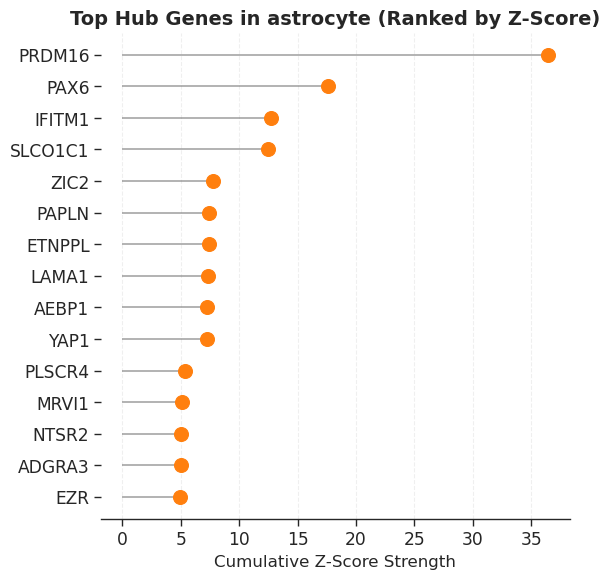

In [17]:
# Use previously extracted Astrocyte network data
if network_df is not None:
    plot_hub_genes(network_df_astro, 'astrocyte', palette_color='#ff7f0e')